In [2]:
import pandas as pd

# Загрузка данных
file_path = 'Market_Basket_Optimisation.csv'
data = pd.read_csv(file_path, header=None)

# Просмотр первых строк
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


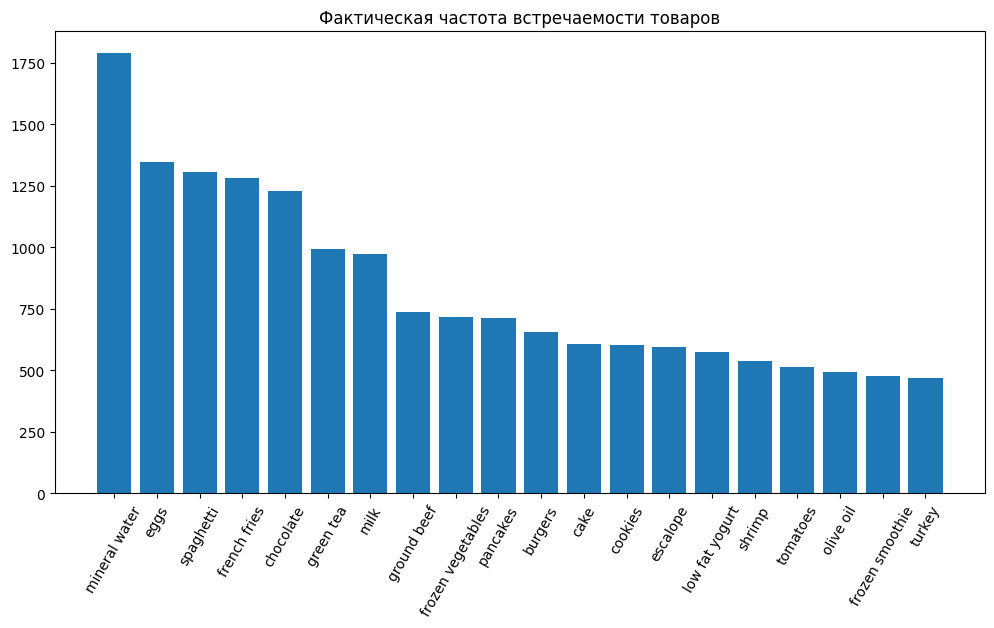

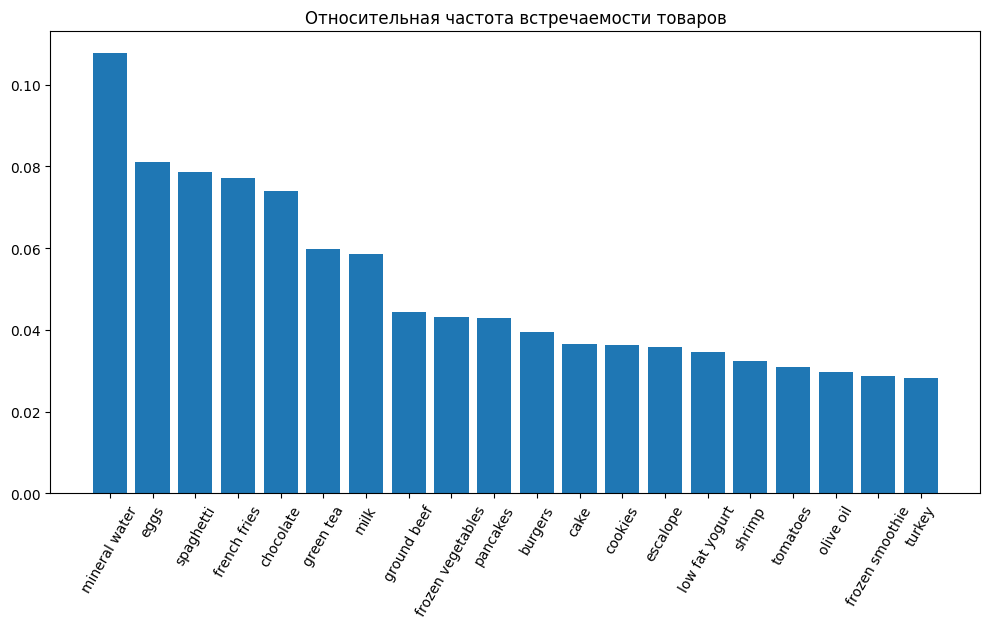

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

# Подсчет всех товаров
items = Counter()
for transaction in data.values:
    items.update([item for item in transaction if pd.notna(item)])

# Отбор 20 наиболее популярных товаров
top_20_items = items.most_common(20)
items_names, items_counts = zip(*top_20_items)

# Построение гистограммы фактической частоты
plt.figure(figsize=(12, 6))
plt.bar(items_names, items_counts)
plt.xticks(rotation=60)
plt.title('Фактическая частота встречаемости товаров')
plt.show()

# Относительная частота
total_items = sum(items_counts)
relative_frequency = [count / total_items for count in items_counts]

# Построение гистограммы относительной частоты
plt.figure(figsize=(12, 6))
plt.bar(items_names, relative_frequency)
plt.xticks(rotation=60)
plt.title('Относительная частота встречаемости товаров')
plt.show()


In [4]:
# Импорт необходимых модулей
from apriori_python import apriori

# Преобразование данных в список списков для алгоритма Apriori
transactions = []
for transaction in data.values:
    transactions.append([item for item in transaction if pd.notna(item)])

# Применение алгоритма Apriori
itemsets, rules = apriori(transactions, minSup=0.02, minConf=0.2)

# Отбор 10 наилучших правил
sorted_rules = sorted(rules, key=lambda x: x[2], reverse=True)[:10]

# Вывод правил
for rule in sorted_rules:
    print(f"Rule: {rule[0]} -> {rule[1]}, Confidence: {rule[2]}")

Rule: {'soup'} -> {'mineral water'}, Confidence: 0.45646437994722955
Rule: {'olive oil'} -> {'mineral water'}, Confidence: 0.4190283400809717
Rule: {'ground beef'} -> {'mineral water'}, Confidence: 0.41655359565807326
Rule: {'ground beef'} -> {'spaghetti'}, Confidence: 0.3989145183175034
Rule: {'cooking oil'} -> {'mineral water'}, Confidence: 0.39425587467362927
Rule: {'chicken'} -> {'mineral water'}, Confidence: 0.38
Rule: {'frozen vegetables'} -> {'mineral water'}, Confidence: 0.3748251748251748
Rule: {'milk'} -> {'mineral water'}, Confidence: 0.37037037037037035
Rule: {'tomatoes'} -> {'mineral water'}, Confidence: 0.3567251461988304
Rule: {'pancakes'} -> {'mineral water'}, Confidence: 0.3548387096774194


In [20]:
# Импорт библиотеки
from apyori import apriori as apyori_apriori

# Применение алгоритма Apriori с гиперпараметрами
apyori_rules = list(apyori_apriori(transactions, min_support=0.02, min_confidence=0.2))

# Отбор 10 наилучших правил
apyori_rules = apyori_rules[:10]

# Вывод правил
for rule in apyori_rules:
    for ordered_stat in rule.ordered_statistics:
        print(f"Rule: {list(ordered_stat.items_base)} -> {list(ordered_stat.items_add)}, Confidence: {ordered_stat.confidence}")


Rule: [] -> ['mineral water'], Confidence: 0.23836821757099053
Rule: ['burgers'] -> ['eggs'], Confidence: 0.33027522935779813
Rule: ['burgers'] -> ['french fries'], Confidence: 0.25229357798165136
Rule: ['burgers'] -> ['mineral water'], Confidence: 0.2798165137614679
Rule: ['burgers'] -> ['spaghetti'], Confidence: 0.24617737003058102
Rule: ['cake'] -> ['mineral water'], Confidence: 0.33881578947368424
Rule: ['chicken'] -> ['mineral water'], Confidence: 0.38000000000000006
Rule: ['chocolate'] -> ['eggs'], Confidence: 0.20260374288039054
Rule: ['chocolate'] -> ['french fries'], Confidence: 0.209926769731489
Rule: ['french fries'] -> ['chocolate'], Confidence: 0.20124804992199688
Rule: ['frozen vegetables'] -> ['chocolate'], Confidence: 0.24055944055944053


In [7]:
# Импорт библиотеки
from efficient_apriori import apriori as efficient_apriori

# Применение алгоритма Apriori
itemsets, efficient_rules = efficient_apriori(transactions, min_support=0.02, min_confidence=0.2)

# Отбор 10 наилучших правил
efficient_rules = sorted(efficient_rules, key=lambda rule: rule.confidence, reverse=True)[:10]

# Вывод правил
for rule in efficient_rules:
    print(f"Rule: {rule.lhs} -> {rule.rhs}, Confidence: {rule.confidence}")

Rule: ('soup',) -> ('mineral water',), Confidence: 0.45646437994722955
Rule: ('olive oil',) -> ('mineral water',), Confidence: 0.4190283400809717
Rule: ('ground beef',) -> ('mineral water',), Confidence: 0.41655359565807326
Rule: ('ground beef',) -> ('spaghetti',), Confidence: 0.3989145183175034
Rule: ('cooking oil',) -> ('mineral water',), Confidence: 0.39425587467362927
Rule: ('chicken',) -> ('mineral water',), Confidence: 0.38
Rule: ('frozen vegetables',) -> ('mineral water',), Confidence: 0.3748251748251748
Rule: ('milk',) -> ('mineral water',), Confidence: 0.37037037037037035
Rule: ('tomatoes',) -> ('mineral water',), Confidence: 0.3567251461988304
Rule: ('pancakes',) -> ('mineral water',), Confidence: 0.3548387096774194


In [8]:
import pandas as pd
from fpgrowth_py import fpgrowth
from itertools import combinations

# Загрузка данных
file_path = 'Market_Basket_Optimisation.csv'
data = pd.read_csv(file_path, header=None)

# Преобразование данных в список списков для алгоритмов
transactions = []
for transaction in data.values:
    transactions.append([item for item in transaction if pd.notna(item)])

# Применение алгоритма FP-Growth
min_support = 0.02
min_conf = 0.2  # Минимальная доверительная вероятность

fpgrowth_itemsets, fpgrowth_rules = fpgrowth(transactions, min_support, min_conf)

# Отбор 10 наилучших правил
fpgrowth_rules = sorted(fpgrowth_rules, key=lambda rule: rule[2], reverse=True)[:10]

# Вывод правил
for rule in fpgrowth_rules:
    print(f"Rule: {rule[0]} -> {rule[1]}, Confidence: {rule[2]}")


Rule: {'soup'} -> {'mineral water'}, Confidence: 0.45646437994722955
Rule: {'olive oil'} -> {'mineral water'}, Confidence: 0.4190283400809717
Rule: {'ground beef'} -> {'mineral water'}, Confidence: 0.41655359565807326
Rule: {'ground beef'} -> {'spaghetti'}, Confidence: 0.3989145183175034
Rule: {'cooking oil'} -> {'mineral water'}, Confidence: 0.39425587467362927
Rule: {'chicken'} -> {'mineral water'}, Confidence: 0.38
Rule: {'frozen vegetables'} -> {'mineral water'}, Confidence: 0.3748251748251748
Rule: {'milk'} -> {'mineral water'}, Confidence: 0.37037037037037035
Rule: {'tomatoes'} -> {'mineral water'}, Confidence: 0.3567251461988304
Rule: {'pancakes'} -> {'mineral water'}, Confidence: 0.3548387096774194


Apriori (apriori_python) - Время выполнения: 2.4065 секунд
Apriori (apyori) - Время выполнения: 0.0720 секунд
Apriori (efficient_apriori) - Время выполнения: 0.0224 секунд
FP-Growth - Время выполнения: 0.4935 секунд


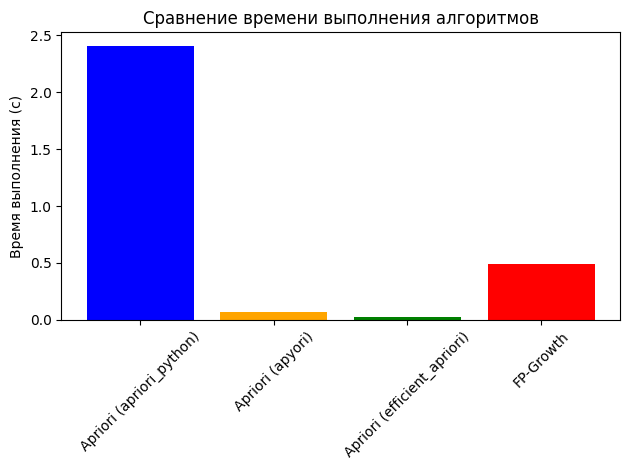

In [4]:
import time
import pandas as pd
from fpgrowth_py import fpgrowth
from efficient_apriori import apriori as efficient_apriori
from apyori import apriori as apyori_apriori
from apriori_python import apriori
import matplotlib.pyplot as plt

# Загрузка данных
file_path = 'Market_Basket_Optimisation.csv'
data = pd.read_csv(file_path, header=None)

# Преобразование данных в список списков для алгоритма Apriori
transactions = []
for transaction in data.values:
    transactions.append([item for item in transaction if pd.notna(item)])

# Сравнение времени выполнения для apriori_python
start_time = time.time()
itemsets, rules = apriori(transactions, minSup=0.02, minConf=0.2)
end_time = time.time()
time_apriori = end_time - start_time
print(f"Apriori (apriori_python) - Время выполнения: {time_apriori:.4f} секунд")

# Сравнение времени выполнения для apyori
start_time = time.time()
apyori_rules = list(apyori_apriori(transactions, min_support=0.02, min_confidence=0.2))
end_time = time.time()
time_apyori = end_time - start_time
print(f"Apriori (apyori) - Время выполнения: {time_apyori:.4f} секунд")

# Сравнение времени выполнения для efficient_apriori
start_time = time.time()
itemsets, efficient_rules = efficient_apriori(transactions, min_support=0.02, min_confidence=0.2)
end_time = time.time()
time_efficient = end_time - start_time
print(f"Apriori (efficient_apriori) - Время выполнения: {time_efficient:.4f} секунд")

# Сравнение времени выполнения для FP-Growth
start_time = time.time()
min_support = 0.02
min_conf = 0.2  # Минимальная доверительная вероятность
fpgrowth_itemsets, fpgrowth_rules = fpgrowth(transactions, min_support, min_conf)
end_time = time.time()
time_FPGrowth = end_time - start_time
print(f"FP-Growth - Время выполнения: {time_FPGrowth:.4f} секунд")

# Подготовка данных для графика
execution_times = [time_apriori, time_apyori, time_efficient, time_FPGrowth]
algorithms = ['Apriori (apriori_python)', 'Apriori (apyori)', 'Apriori (efficient_apriori)', 'FP-Growth']

# Построение графика
plt.bar(algorithms, execution_times, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Время выполнения (с)')
plt.title('Сравнение времени выполнения алгоритмов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
